## Transformations
#### Box Cox Transformation - Yeo Johnson Transformation - Quantile Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# generate non-normal data ( exponential dsitributions )
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['Values'])
df

,Values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
995,0.205564
996,1.446892
997,5.574577
998,0.519217


<Axes: xlabel='Values', ylabel='Count'>

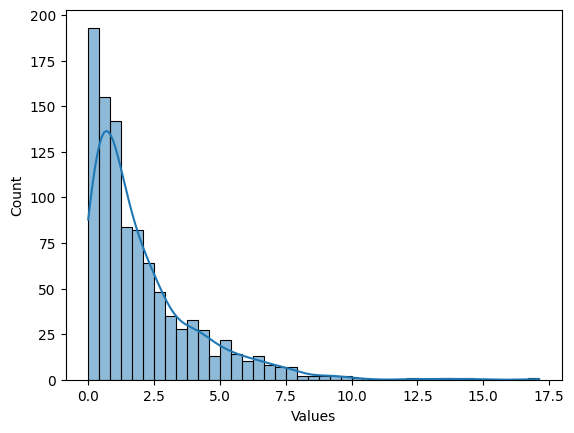

In [3]:
sns.histplot(df['Values'], kde=True)

In [4]:
(df['Values'] == 0.001092).sum()

np.int64(0)

In [5]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox') # data must be positive 
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
qt_normal = QuantileTransformer(output_distribution='normal')

df['Box_Cox'] = pt_boxcox.fit_transform(df[['Values']] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['Values']])
df['Quantile'] = qt_normal.fit_transform(df[['Values']])

In [6]:
df.head()

,Values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677330,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


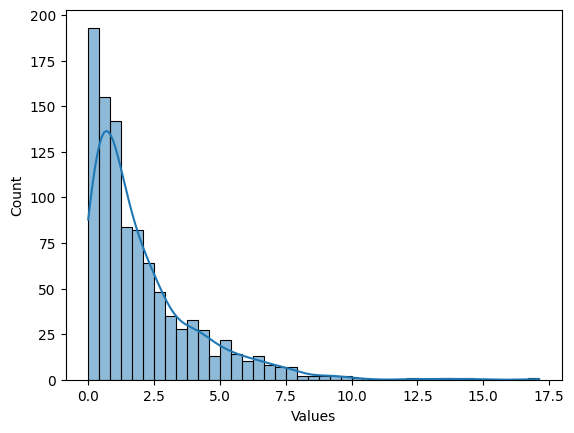

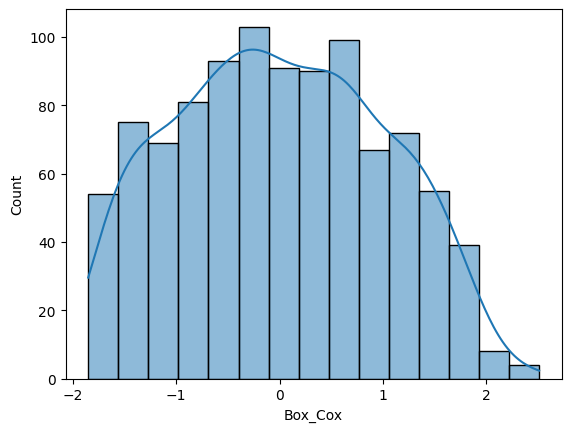

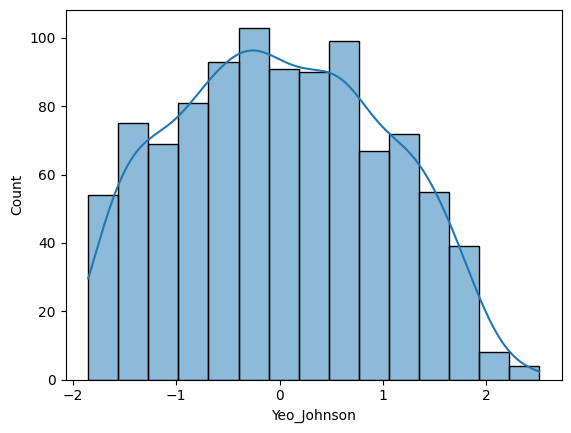

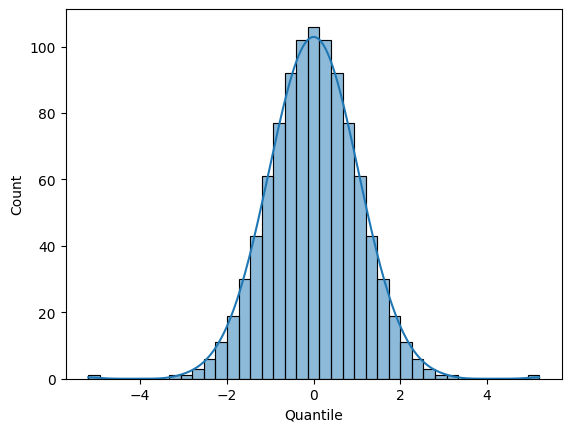

In [7]:
# Create histograms for all columns
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

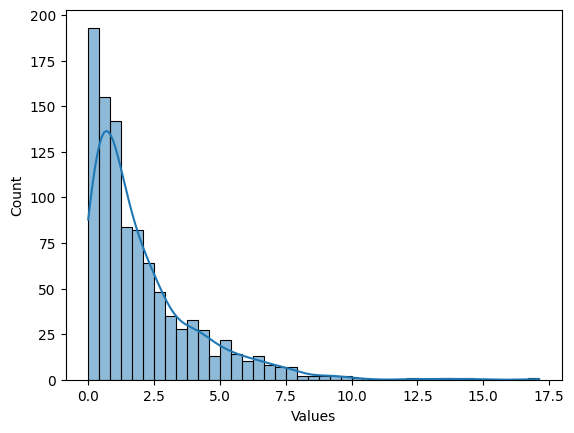

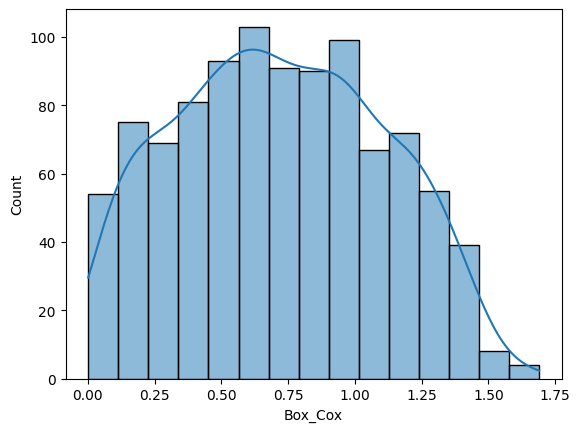

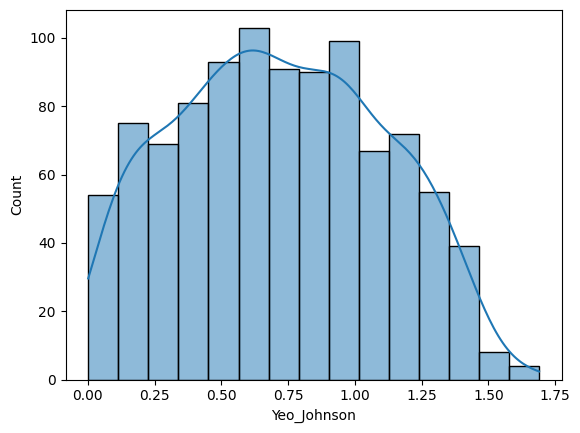

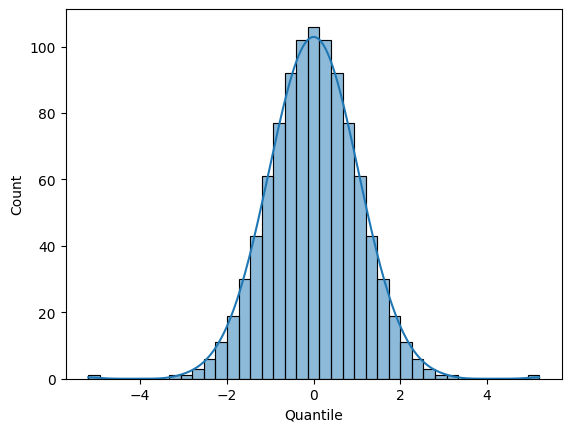

In [8]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False) # data must be positive 
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

df['Box_Cox'] = pt_boxcox.fit_transform(df[['Values']] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['Values']])
df['Quantile'] = qt_normal.fit_transform(df[['Values']])

# Create histograms for all columns
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

## Normalization

In [9]:
from sklearn.preprocessing import Normalizer
data = [[1, 32, 79], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.00892857 0.28571429 0.70535714]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


#### L2 Normalization:
Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data. The L2 norm is calculated as the square root of the sum of the squared vector values.

In [10]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


#### L1 Normalization:
Also rescales each sample (row) but with a different approach, ensuring the sum of the absolute values is 1 in each row. The L1 norm is calculated as the sum of the absolute vector values. Example:

In [11]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


## Log Transformation

In [12]:
import pandas as pd
import numpy as np

# example dataset with skewed values
df = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}
df = pd.DataFrame(df)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


In [13]:
df['log_values'] = np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


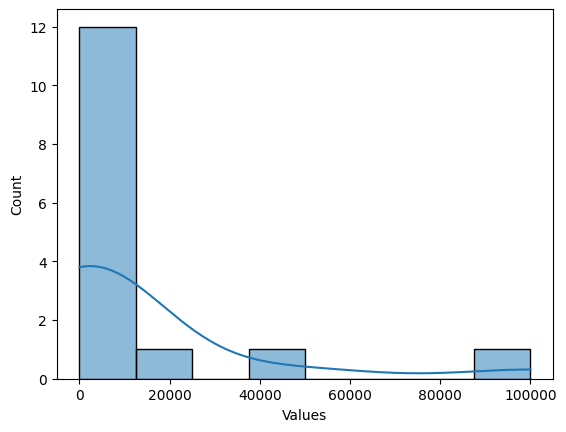

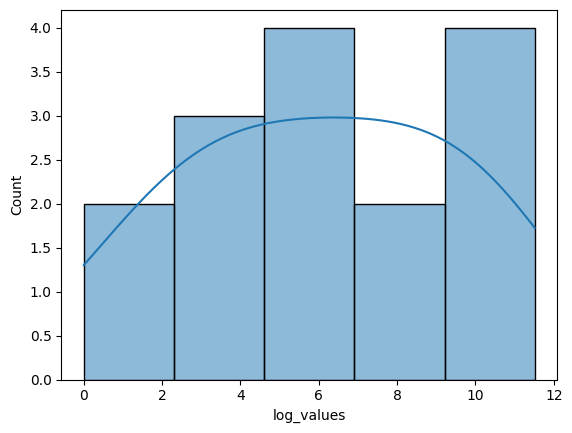

In [14]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()